In [188]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
import nibabel as nb
import random

from sklearn.preprocessing import MinMaxScaler
import glob


In [189]:
import tensorflow 
tensorflow.__version__

'2.11.0'

In [190]:
train_data_path = "./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"

# Displaying one image
Loading image with nibabel

In [191]:
test_image_flair = nb.load(train_data_path+"BraTS20_Training_355/BraTS20_Training_355_flair.nii").get_fdata()
test_image_seg = nb.load(train_data_path+"BraTS20_Training_355/BraTS20_Training_355_seg.nii").get_fdata()
test_image_t1 = nb.load(train_data_path+"BraTS20_Training_355/BraTS20_Training_355_t1ce.nii").get_fdata()
test_image_t2 = nb.load(train_data_path+"BraTS20_Training_355/BraTS20_Training_355_t2.nii").get_fdata()

Scaling data using MinMaxScaler()

In [192]:
scaler = MinMaxScaler()

In [193]:
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
# test_image_seg = scaler.fit_transform(test_image_seg.reshape(-1, test_image_seg.shape[-1])).reshape(test_image_seg.shape)
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)


In [194]:
# Testing scale
print("The minimum value is: ",test_image_flair.min())
print("The maximum value is: ",test_image_flair.max())

The minimum value is:  0.0
The maximum value is:  1.0


In [195]:
test_image_flair.shape

(240, 240, 155)

In [196]:
test_image_flair.shape
# test_image_flair

(240, 240, 155)

Mask

In [197]:
# test_image_seg is going to be mask with 4 labels
np.unique(test_image_seg)

array([0., 1., 2., 4.])

In [198]:
# Converting to int
test_image_seg = test_image_seg.astype(np.uint8)
np.unique(test_image_seg)

array([0, 1, 2, 4], dtype=uint8)

In [199]:
# reassigning value 4 to 3
test_image_seg[test_image_seg == 4] = 3
np.unique(test_image_seg)

array([0, 1, 2, 3], dtype=uint8)

In [200]:
# np.unique(test_image_flair).shape

Plotting Image with random slices

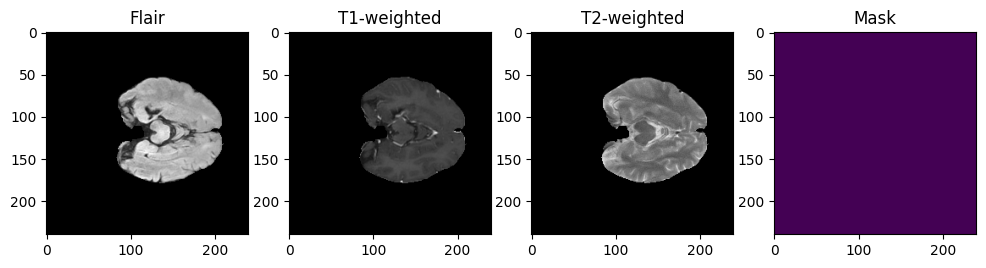

In [201]:
# Random value (dim)
slice = random.randint(0, test_image_seg.shape[2])

# Figure
plt.figure(figsize=(12,8))

# Flair image
plt.subplot(141)
plt.imshow(test_image_flair[:,:,slice], cmap='gray')
plt.title("Flair")

# T1-weighted image
plt.subplot(142)
plt.imshow(test_image_t1[:,:,slice], cmap='gray')
plt.title("T1-weighted")

# T2-weighted image
plt.subplot(143)
plt.imshow(test_image_t2[:,:,slice], cmap='gray')
plt.title("T2-weighted")

# Mask image
plt.subplot(144)
plt.imshow(test_image_seg[:,:,slice])
plt.title("Mask")

plt.show()

# Combining 3 images by exploring to channels and Cropping

3 images T1,T2,Flair are going to be combined since thay have more informative


In [202]:
combined = np.stack([test_image_flair,test_image_t2,test_image_t1],axis=3)    

In [203]:
combined.shape # (240, 240, 155, 3)

(240, 240, 155, 3)

Cropping image

In [204]:
# Crop combined
combined_cropped = combined[56:184,56:184,13:141]  

# Crop MASK
mask_cropped = test_image_seg[56:184,56:184,13:141] 

In [205]:
print("Cropped shape of combined image: ", combined_cropped.shape)
print("Cropped shape of mask image: ", mask_cropped.shape)

Cropped shape of combined image:  (128, 128, 128, 3)
Cropped shape of mask image:  (128, 128, 128)


Plotting cropped image

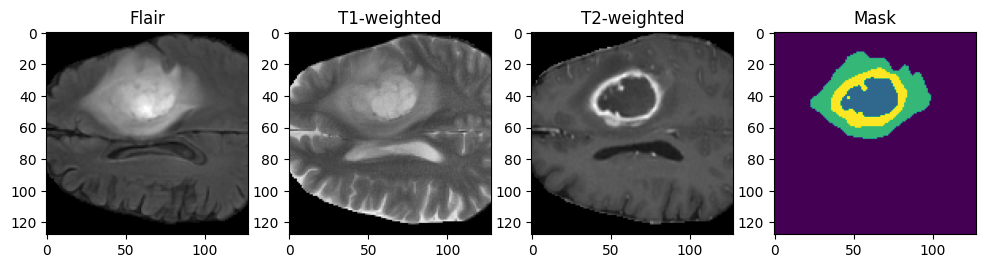

In [206]:
# Random value (dim)
slice = random.randint(0, test_image_seg.shape[2])

# Figure
plt.figure(figsize=(12,8))

# Flair image
plt.subplot(141)
plt.imshow(combined_cropped[:,:,slice,0], cmap='gray')
plt.title("Flair")

# T1-weighted image
plt.subplot(142)
plt.imshow(combined_cropped[:,:,slice,1], cmap='gray')
plt.title("T1-weighted")

# T2-weighted image
plt.subplot(143)
plt.imshow(combined_cropped[:,:,slice,2], cmap='gray')
plt.title("T2-weighted")

# Mask image
plt.subplot(144)
plt.imshow(mask_cropped[:,:,slice])
plt.title("Mask")

plt.show()

Saving test data

In [207]:
# imsave("BraTS2020_TrainingData/combined355.tiff", combined_cropped)

np.save('./data/BraTS2020_TrainingData/test_data.npy', combined_cropped)


In [208]:
val, counts = np.unique(mask_cropped, return_counts=True)
print(val,counts)
print()


[0 1 2 3] [1959129   32235   45483   60305]



Check by loading file 

In [209]:
test_img = np.load("./data/BraTS2020_TrainingData/test_data.npy")

In [210]:
test_img.shape == combined_cropped.shape

True

In [211]:
test_img == combined_cropped 

array([[[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        ...,

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ T

Converting mask to categorical

In [212]:
mask_cropped = to_categorical(mask_cropped, num_classes=4)
mask_cropped.shape

(128, 128, 128, 4)

# Applying for all images

We have done so far with one image, now, it is time to apply what we did for all images in our dataset

In [213]:
# Getting filenames
t2_list = sorted(glob.glob('./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1_list = sorted(glob.glob('./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [214]:
print('Number of files: ',len(t2_list))
print(t2_list[0])
print(t1_list[0])
print(flair_list[0])
print(mask_list[0])

Number of files:  369
./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii
./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii
./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii
./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii


In [216]:
n = len(t2_list)

for img in range(n):
    flair_img = nb.load(flair_list[img]).get_fdata()
    t1_img = nb.load(t1_list[img]).get_fdata()
    t2_img = nb.load(t2_list[img]).get_fdata()
    mask_img = nb.load(mask_list[img]).get_fdata()

    flair_img = scaler.fit_transform(flair_img.reshape(-1, flair_img.shape[-1])).reshape(flair_img.shape)
    t1_img = scaler.fit_transform(t1_img.reshape(-1, t1_img.shape[-1])).reshape(t1_img.shape)
    t2_img = scaler.fit_transform(t2_img.reshape(-1, t2_img.shape[-1])).reshape(t2_img.shape)

    mask_img = mask_img.astype(np.uint8)

    mask_img[mask_img == 4] = 3

    combined = np.stack([flair_img,t1_img,t2_img],axis=3)  

    # Crop combined
    combined_cropped = combined[56:184,56:184,13:141]  

    # Crop MASK
    mask_cropped = test_image_seg[56:184,56:184,13:141] 

    if (1-(counts[0]/counts.sum())) > 0.01:
        mask_cropped = to_categorical(mask_cropped, num_classes=4)
        np.save('./data/BraTS2020_TrainingData/Input_Data/images/image_' + str(img) + '.npy', combined_cropped)
        np.save('./data/BraTS2020_TrainingData/Input_Data/masks/mask_' + str(img) + '.npy', mask_cropped)
    

    
    

    

    

FileNotFoundError: [Errno 2] No such file or directory: './data/BraTS2020_TrainingData/Input_Data/images/image_0.npy'